In [1]:
import sys
import os

# Add project root to Python path
project_root = os.path.abspath(os.path.join(".."))
if project_root not in sys.path:
    sys.path.append(project_root)

print("Project root added to sys.path:", project_root)


Project root added to sys.path: C:\Users\rakes\cats-vs-dogs-transfer-learning


In [2]:
from src.data_loader import get_data_loaders

In [3]:
train_gen, val_gen, test_gen = get_data_loaders()

Found 23565 images belonging to 2 classes.
Found 3750 images belonging to 2 classes.
Found 3750 images belonging to 2 classes.


### Data Loading

Dataset paths were resolved relative to the project root to ensure portability
and correct execution regardless of the notebook’s working directory. This
ensures reliable data loading across different environments.

## Transfer Learning with MobileNetV2 (Feature Extraction Phase)

In [4]:
import sys, os
project_root = os.path.abspath(os.path.join(".."))
if project_root not in sys.path:
    sys.path.append(project_root)


In [5]:
from src.data_loader import get_data_loaders
from src.transfer_model import build_mobilenetv2_transfer_model


In [6]:
train_gen, val_gen, test_gen = get_data_loaders()


Found 23565 images belonging to 2 classes.
Found 3750 images belonging to 2 classes.
Found 3750 images belonging to 2 classes.


In [7]:
model, base_model = build_mobilenetv2_transfer_model()
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [8]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=8
)


Epoch 1/8
1473/1473 [==============================] - 592s 401ms/step - loss: 0.0768 - accuracy: 0.9717 - val_loss: 0.0415 - val_accuracy: 0.9835
Epoch 2/8
1473/1473 [==============================] - 652s 443ms/step - loss: 0.0589 - accuracy: 0.9767 - val_loss: 0.0280 - val_accuracy: 0.9904
Epoch 3/8
1473/1473 [==============================] - 613s 416ms/step - loss: 0.0532 - accuracy: 0.9801 - val_loss: 0.0273 - val_accuracy: 0.9912
Epoch 4/8
1473/1473 [==============================] - 646s 438ms/step - loss: 0.0537 - accuracy: 0.9796 - val_loss: 0.0262 - val_accuracy: 0.9915
Epoch 5/8
1473/1473 [==============================] - 649s 440ms/step - loss: 0.0482 - accuracy: 0.9809 - val_loss: 0.0246 - val_accuracy: 0.9917
Epoch 6/8
1473/1473 [==============================] - 611s 415ms/step - loss: 0.0498 - accuracy: 0.9821 - val_loss: 0.0275 - val_accuracy: 0.9888
Epoch 7/8
1473/1473 [==============================] - 641s 435ms/step - loss: 0.0432 - accuracy: 0.9831 - val_loss: 0

### Phase 1 Results (Feature Extraction)

The MobileNetV2-based transfer learning model achieved high validation accuracy
during the feature extraction phase. This demonstrates the effectiveness of
pre-trained ImageNet features in capturing relevant visual patterns for the
Cats vs Dogs classification project.


### Training Curves (Phase 1)

The following plots show the training and validation accuracy and loss during
the feature extraction phase of MobileNetV2.


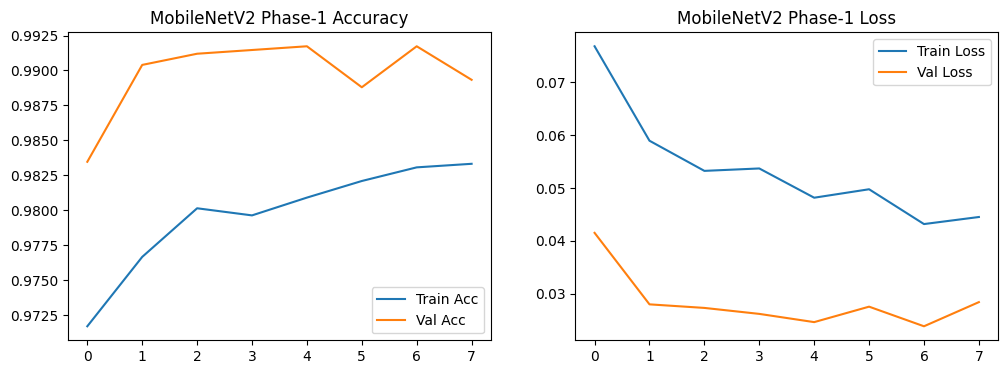

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("MobileNetV2 Phase-1 Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("MobileNetV2 Phase-1 Loss")
plt.legend()

plt.show()


In [11]:
model.save("models/mobilenetv2_phase1.h5")


c:\Users\rakes\anaconda3\envs\tf_env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [4]:
from src.transfer_model import build_mobilenetv2_transfer_model
from src.trainer import train_phase1


In [5]:
model, base_model = build_mobilenetv2_transfer_model()
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

### Phase 1: Feature Extraction (Modular Training)

Phase-1 training was implemented using a dedicated trainer module to improve
code modularity and reproducibility. During this phase, the pre-trained
MobileNetV2 backbone remained frozen, and only the custom classification head
was trained.


In [6]:
model, history = train_phase1(
    model,
    train_gen,
    val_gen
)


Epoch 1/10
1473/1473 [==============================] - ETA: 0s - loss: 0.0794 - accuracy: 0.9714

C:\Users\rakes\anaconda3\envs\tf_env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1473/1473 [==============================] - 848s 573ms/step - loss: 0.0794 - accuracy: 0.9714 - val_loss: 0.0337 - val_accuracy: 0.9872
Epoch 2/10
1473/1473 [==============================] - 856s 581ms/step - loss: 0.0573 - accuracy: 0.9779 - val_loss: 0.0279 - val_accuracy: 0.9901
Epoch 3/10
1473/1473 [==============================] - 855s 580ms/step - loss: 0.0553 - accuracy: 0.9789 - val_loss: 0.0333 - val_accuracy: 0.9888
Epoch 4/10
1473/1473 [==============================] - 873s 592ms/step - loss: 0.0494 - accuracy: 0.9810 - val_loss: 0.0402 - val_accuracy: 0.9845
Epoch 5/10
1473/1473 [==============================] - 852s 578ms/step - loss: 0.0490 - accuracy: 0.9809 - val_loss: 0.0254 - val_accuracy: 0.9912
Epoch 6/10
1473/1473 [==============================] - 855s 581ms/step - loss: 0.0465 - accuracy: 0.9819 - val_loss: 0.0219 - val_accuracy: 0.9915
Epoch 7/10
1473/1473 [==============================] - 859s 583ms/step - loss: 0.0456 - accuracy: 0.9829 - val_loss: 0.028

In [5]:
import os
os.path.exists("models/mobilenetv2_phase1.h5")


True